In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://github.com/alfredwisana/machine_learning/raw/main/spam.csv'
df = pd.read_csv(url)

In [4]:
# encoding preprocessing cleaning
df['yesno'] = df['yesno'].replace('y',1)
df['yesno'] = df['yesno'].replace('n',0)
print(df.isnull().sum())
df.head()

crl.tot    0
dollar     0
bang       0
money      0
n000       0
make       0
yesno      0
dtype: int64


,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [5]:
# correlation matrix
df.corr()

,crl.tot,dollar,bang,money,n000,make,yesno
crl.tot,1.000000,0.201948,0.036321,0.080993,0.165977,0.089165,0.249164
dollar,0.201948,1.000000,0.142913,0.104691,0.310971,0.117419,0.323629
bang,0.036321,0.142913,1.000000,0.051076,0.070103,0.058292,0.241888
money,0.080993,0.104691,0.051076,1.000000,0.052587,0.188155,0.216111
n000,0.165977,0.310971,0.070103,0.052587,1.000000,0.134072,0.334787
make,0.089165,0.117419,0.058292,0.188155,0.134072,1.000000,0.126208
yesno,0.249164,0.323629,0.241888,0.216111,0.334787,0.126208,1.000000


In [6]:
df.describe()

,crl.tot,dollar,bang,money,n000,make,yesno
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553,0.394045
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358,0.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000,1.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000,1.000000


In [7]:
df_copy = df.copy(deep=True)

In [8]:
scaler = MinMaxScaler()
df_copy['crl.tot'] = scaler.fit_transform(df_copy[['crl.tot']])
df_copy

,crl.tot,dollar,bang,money,n000,make,yesno
0,0.017487,0.000,0.778,0.00,0.00,0.00,1
1,0.064836,0.180,0.372,0.43,0.43,0.21,1
2,0.142551,0.184,0.276,0.06,1.16,0.06,1
3,0.011995,0.000,0.137,0.00,0.00,0.00,1
4,0.011995,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,0.005492,0.000,0.000,0.00,0.00,0.31,0
4597,0.000821,0.000,0.353,0.00,0.00,0.00,0
4598,0.007386,0.000,0.000,0.00,0.00,0.30,0
4599,0.004861,0.000,0.000,0.00,0.00,0.96,0


In [9]:
X = df_copy.drop('yesno', axis=1)
y = df_copy.yesno
#data dipisah menjadi training dan testing
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
#data dipisah menjadi trainging dan validation
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size=0.2,random_state=123)

P value Test dengan
alpha = 5% (0.05)

In [10]:
#mencari p value
model_sm = sm.Logit(y_train,X_train)
result = model_sm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.599558
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  yesno   No. Observations:                 2944
Model:                          Logit   Df Residuals:                     2938
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.1044
Time:                        20:20:32   Log-Likelihood:                -1765.1
converged:                       True   LL-Null:                       -1970.9
Covariance Type:            nonrobust   LLR p-value:                 8.962e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
crl.tot       -2.2453      1.290     -1.740      0.082      -4.774       0.283
dollar         4.0655      0.594      6.849      0.000       2.902       5.229
bang           0.4862      0.104      4.689      0.000       0.283       0.689
money          0.9213      0.229      4.029      0.000       0.473       1.369
n000           3.1562      0.450      7.008      0.000       2.273       4.039
make          -1.0247      0.186     -5.501      0.000      -1.390      -0.660
==============================================================================
"""

HO: Predictor tidak memiliki relasi yang signifikan terhadap response
H1: Predictor memiliki relasi yang signifikan terhadap response

H0 tidak ada relasi kuat antara predictor dan response
H0 ditolak karena p value <=0.05

semua attribute penting karena memiliki nilai significant yang kuat

In [11]:
#validasi menggunakan validation set
logistic_regression = LogisticRegression(solver='lbfgs',max_iter=200, random_state=1234)
logistic_regression.fit(X_train,y_train)

y_val_pred = logistic_regression.predict(X_val)
accuracy_score(y_val,y_val_pred)

0.8125

In [12]:
#hitung mse untuk validation set
mse = mean_squared_error(y_val,y_val_pred)
mse

0.1875

Graphic Logistic Regression

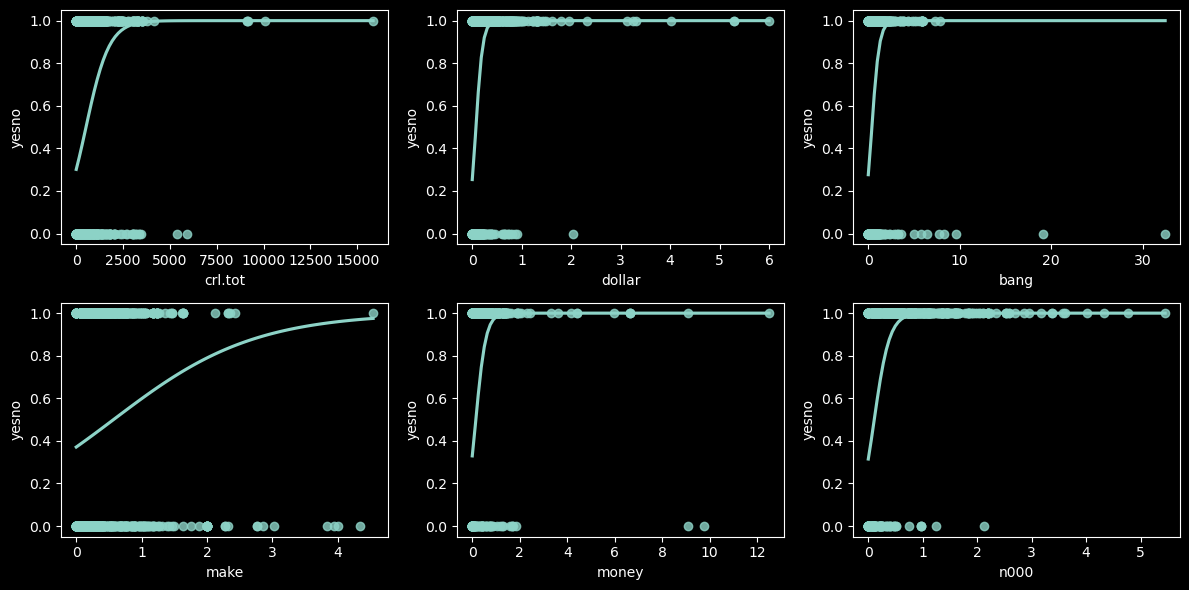

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.regplot(x=df['crl.tot'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,2)
sns.regplot(x=df['dollar'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,3)
sns.regplot(x=df['bang'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,4)
sns.regplot(x=df['make'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,5)
sns.regplot(x=df['money'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,6)
sns.regplot(x=df['n000'], y=df['yesno'], logistic=True, ci=None)

plt.tight_layout()
plt.show()

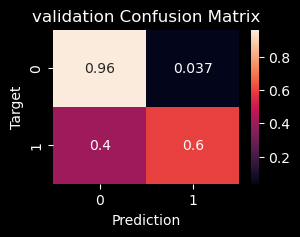

In [13]:
cf = confusion_matrix(y_val, y_val_pred, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

In [14]:
print('roc_auc_score',roc_auc_score(y_val,y_val_pred))

roc_auc_score 0.7795800653096103


In [15]:
# k-fold cross validation
score = cross_val_score(logistic_regression,X_train,y_train,scoring=None,cv=10)
score.mean()

0.8230335524040123

In [18]:
from sklearn.metrics import precision_score

In [33]:
#evaluasi menggunakan kfold cross validation
kf = KFold(n_splits=10)
mse_scores = []
fold = 1
for train_index, val_index in kf.split(X_temp):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    logistic_regression.fit(X_train,y_train)
    y_pred = logistic_regression.predict(X_val)
    precision = precision_score(y_val, y_pred)
    mse = mean_squared_error(y_val,y_pred)
    mse_scores.append(mse)
    print("="*50)
    print(f"Fold : {fold}")
    print("="*50)
    print("mean squared error %0.2f"%mse)
    print("precision %0.2f"%precision)
    print("="*50)
    fold+=1
    
avg_mse = sum(mse_scores)/len(mse_scores)
print("Average MSE Across All Folds:", avg_mse)
print("score:", accuracy_score(y_val,y_pred))

Fold : 1
mean squared error 0.23
precision 1.00
Fold : 2
mean squared error 0.25
precision 1.00
Fold : 3
mean squared error 0.30
precision 1.00
Fold : 4
mean squared error 0.23
precision 1.00
Fold : 5
mean squared error 0.31
precision 0.99
Fold : 6
mean squared error 0.09
precision 0.00
Fold : 7
mean squared error 0.10
precision 0.00
Fold : 8
mean squared error 0.09
precision 0.00
Fold : 9
mean squared error 0.08
precision 0.00
Fold : 10
mean squared error 0.06
precision 0.00
Average MSE Across All Folds: 0.17418478260869566
score: 0.9375


In [ ]:
#testing data
y_test_pred = logistic_regression.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.8642779587404995

1. Validation Set (Validasi Set):

Bias: Validation set dapat menghasilkan perkiraan bias yang lebih tinggi daripada K-Fold Cross-Validation. Ini karena Anda hanya mengukur kinerja model pada satu subset data validasi.

Varians: Pengukuran bias yang tinggi pada satu set data validasi bisa mengakibatkan model menjadi overfit pada data tersebut, menghasilkan varians yang tinggi.

2. K-Fold Cross-Validation:

Bias: K-Fold Cross-Validation cenderung memberikan perkiraan bias yang lebih baik karena Anda mengukur kinerja model pada berbagai subset data pengujian yang berbeda.

Varians: Dengan menggunakan lebih banyak data pengujian dalam K-Fold Cross-Validation, model memiliki kesempatan untuk menggeneralis lebih baik, mengurangi risiko overfitting, dan menghasilkan varians yang lebih rendah.